<a href="https://colab.research.google.com/github/ipaguilarc/-Clase_ML_2025_4/blob/main/GRUPO_8_PROYECTO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial**

**8. Machine Learning and Deep Learning**

**Docente:** Msc. Renzo Claure Aracena.

**Proyecto Modelo de Aprendizaje Supervisado para clasificación**

**Integrantes Grupo 8:**

* Aguilar Cabrera Patricia
* Aliaga Nina David
* Aponte Zuñiga Harold
* Baltazar Balderrama Ruben
* Garcia Zelaya Jhonny

***IMPORTAR LIBRERIAS***

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#Libreria para seleccionar variables de entrenamiento
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#Libreria para estandarizar datos
from sklearn.preprocessing import StandardScaler
#Librerias de Machine learning aplicado a clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#Librerias para validacion de entrenamiento y prueba
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

**1.- TRATAMIENTO DE DATOS**


In [ ]:
#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv('GRUPO 3_1.csv', delimiter = '|')

print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras filas del dataset:")
display(df.head())

Dimensiones del dataset: (10000, 66)

Primeras filas del dataset:


,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,0.000008,3032834,SI,0.000000,0.000000,0.00000,0.790010,226.635983,1.493656,0.000000,...,0.000413,0.039569,0.168177,0.000000,0.0,0.0,0.000000,0.241082,0.00000,0.022198
1,0.000024,330323800,NO,0.000000,0.000000,0.00000,0.000000,0.236730,0.000000,0.000000,...,0.000000,0.047265,0.039317,0.000000,0.0,0.0,0.000000,0.833869,0.00000,0.000000
2,0.000025,270961897,SI,0.000000,0.093916,0.00000,160.044629,748.575600,3.053709,0.000000,...,0.000190,0.364742,0.167146,0.000336,0.0,0.0,0.000000,0.166327,0.00000,0.001961
3,0.000044,264138040,NO,0.000000,0.180006,0.00000,0.428190,3.973445,0.037748,0.000000,...,0.000000,0.133315,0.004763,0.000000,0.0,0.0,0.000000,0.630348,0.00000,0.007888
4,0.000067,7663508,NO,5830.495244,13.598254,0.43192,671.426908,1229.464863,4.764769,0.014773,...,0.003644,0.008413,0.047617,0.000000,0.0,0.0,0.000443,0.541675,0.00001,0.018486


**1.1.- Analisis y validacion de los datos de las variables**

In [ ]:
print("\nInformación del dataset:")
display(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALEAT    10000 non-null  float64
 1   ID       10000 non-null  int64  
 2   OBJ      10000 non-null  object 
 3   V1       10000 non-null  float64
 4   V2       10000 non-null  float64
 5   V3       10000 non-null  float64
 6   V4       10000 non-null  float64
 7   V5       10000 non-null  float64
 8   V6       10000 non-null  float64
 9   V7       10000 non-null  float64
 10  V8       10000 non-null  float64
 11  V9       10000 non-null  float64
 12  V10      10000 non-null  float64
 13  V11      10000 non-null  float64
 14  V12      10000 non-null  float64
 15  V13      10000 non-null  float64
 16  V14      10000 non-null  float64
 17  V15      10000 non-null  float64
 18  V16      10000 non-null  float64
 19  V17      10000 non-null  float64
 20  V18      10000 non-null  

None

**Las columnas de V1 a V31P contienen valores enteros y de V1_P a V31_P.1 Contienen valores parciales, los cuales se descartaran porque se realizara estandarizacion de las variables**

*1.1. En las Variables independientes la columna 33 tiene por etiqueta V31_P igual que la columna No. 65 de las variables relativas. Se cambia la etiqueta de la columna 33 a V31*.

In [ ]:
df.rename(columns={'V31_P':'V31'}, inplace=True)
df.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,0.000008,3032834,SI,0.000000,0.000000,0.00000,0.790010,226.635983,1.493656,0.000000,...,0.000413,0.039569,0.168177,0.000000,0.0,0.0,0.000000,0.241082,0.00000,0.022198
1,0.000024,330323800,NO,0.000000,0.000000,0.00000,0.000000,0.236730,0.000000,0.000000,...,0.000000,0.047265,0.039317,0.000000,0.0,0.0,0.000000,0.833869,0.00000,0.000000
2,0.000025,270961897,SI,0.000000,0.093916,0.00000,160.044629,748.575600,3.053709,0.000000,...,0.000190,0.364742,0.167146,0.000336,0.0,0.0,0.000000,0.166327,0.00000,0.001961
3,0.000044,264138040,NO,0.000000,0.180006,0.00000,0.428190,3.973445,0.037748,0.000000,...,0.000000,0.133315,0.004763,0.000000,0.0,0.0,0.000000,0.630348,0.00000,0.007888
4,0.000067,7663508,NO,5830.495244,13.598254,0.43192,671.426908,1229.464863,4.764769,0.014773,...,0.003644,0.008413,0.047617,0.000000,0.0,0.0,0.000443,0.541675,0.00001,0.018486


*1.2. Utilizaremos las Variables independientes
el DataFrame df1 contendra los datos completos desde V1 a V31 mas la variable objetivo*

In [ ]:
columnas = ['OBJ'] + [f'V{i}' for i in range(1, 32)]
df1 = df[columnas]
df1.head()

,OBJ,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
0,SI,0.000000,0.000000,0.00000,0.790010,226.635983,1.493656,0.000000,0.0,21.376436,...,1.543714,148.047539,629.232912,0.000000,0.0,0.0,0.000000,902.008639,0.000000,83.054035
1,NO,0.000000,0.000000,0.00000,0.000000,0.236730,0.000000,0.000000,0.0,0.000000,...,0.000000,2.398245,1.994981,0.000000,0.0,0.0,0.000000,42.310939,0.000000,0.000000
2,SI,0.000000,0.093916,0.00000,160.044629,748.575600,3.053709,0.000000,0.0,710.699999,...,3.183555,6116.451989,2802.915138,5.635421,0.0,0.0,0.000000,2789.182657,0.000000,32.883662
3,NO,0.000000,0.180006,0.00000,0.428190,3.973445,0.037748,0.000000,0.0,9.537385,...,0.000000,64.463601,2.303077,0.000000,0.0,0.0,0.000000,304.799772,0.000000,3.814019
4,NO,5830.495244,13.598254,0.43192,671.426908,1229.464863,4.764769,0.014773,0.0,105.787756,...,129.507156,298.999975,1692.419318,0.000000,0.0,0.0,15.734812,19252.240432,0.355581,657.013806


**1.3. Asignacion de valores 1 : SI, 0 : NO

In [ ]:
df1['OBJ'] = df1['OBJ'].map({'SI': 1, 'NO': 0})
df1.head()

/tmp/ipython-input-57-3463041450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OBJ'] = df1['OBJ'].map({'SI': 1, 'NO': 0})


,OBJ,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
0,1,0.000000,0.000000,0.00000,0.790010,226.635983,1.493656,0.000000,0.0,21.376436,...,1.543714,148.047539,629.232912,0.000000,0.0,0.0,0.000000,902.008639,0.000000,83.054035
1,0,0.000000,0.000000,0.00000,0.000000,0.236730,0.000000,0.000000,0.0,0.000000,...,0.000000,2.398245,1.994981,0.000000,0.0,0.0,0.000000,42.310939,0.000000,0.000000
2,1,0.000000,0.093916,0.00000,160.044629,748.575600,3.053709,0.000000,0.0,710.699999,...,3.183555,6116.451989,2802.915138,5.635421,0.0,0.0,0.000000,2789.182657,0.000000,32.883662
3,0,0.000000,0.180006,0.00000,0.428190,3.973445,0.037748,0.000000,0.0,9.537385,...,0.000000,64.463601,2.303077,0.000000,0.0,0.0,0.000000,304.799772,0.000000,3.814019
4,0,5830.495244,13.598254,0.43192,671.426908,1229.464863,4.764769,0.014773,0.0,105.787756,...,129.507156,298.999975,1692.419318,0.000000,0.0,0.0,15.734812,19252.240432,0.355581,657.013806


**1.4. Analisis de las variables categoricas**

In [ ]:
print("\nEstadísticas descriptivas:")
display(df1.describe())


Estadísticas descriptivas:


,OBJ,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.266500,274.490725,132.562740,1.244624,190.635311,282.235524,3.288648,1.922752,0.020540,234.836333,...,20.314487,3472.903634,1546.359051,10.035217,0.407541,12.882016,1.902283,9915.701157,8.080840,181.068256
std,0.442151,1242.048766,911.182989,38.979888,1204.508654,1214.630735,10.106969,24.792077,0.351454,805.277307,...,223.228069,7823.507583,3131.354241,103.383084,5.394956,466.026645,11.157081,19653.439285,327.264941,1088.336060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.340552,5.566562,0.046980,0.000000,0.000000,1.325238,...,0.000000,59.460209,171.239135,0.000000,0.000000,0.000000,0.000000,636.597427,0.000000,2.930692
50%,0.000000,0.000000,0.261401,0.000000,6.864004,32.625982,0.516582,0.000000,0.000000,19.800939,...,0.305860,396.371560,598.487433,0.010807,0.000000,0.000000,0.000000,2610.758792,0.000000,15.637564
75%,1.000000,11.025222,12.040746,0.000000,55.966015,150.586931,2.528939,0.000000,0.000000,127.390496,...,3.911499,2397.799717,1646.305393,0.242617,0.000000,0.000000,0.000000,8763.061604,0.000000,61.300936
max,1.000000,43873.572933,38147.234555,3427.171077,60646.202961,36647.678716,448.206954,961.814251,14.925249,34429.154313,...,18920.195041,97986.255457,79078.976929,5491.587484,369.242862,32998.293864,466.673661,457591.039827,28343.887868,43381.149097


**1.5. Seleccion de las variables mas representativas para el modelo mediante el modelo de CHI CUADRADO**

In [ ]:
# Crear lista de variables categóricas V1, V2, ..., V31
Variables = [f'V{i}' for i in range(1, 32)]

results = []

for var in Variables:
    if var in df1.columns:
        tabla = pd.crosstab(df1[var], df1['OBJ'])
        chi2, p, dof, expected = chi2_contingency(tabla)
        results.append({'variable': var, 'chi2': chi2, 'p_value': p})

results_df = pd.DataFrame(results)

# Filtrar variables con p < 0.05 para relevancia estadística
significant_vars = results_df[results_df['p_value'] < 0.05].sort_values('p_value')

print(significant_vars)

   variable         chi2       p_value
2        V3  2050.194409  1.191505e-08
14      V15  1248.027271  1.242318e-07
1        V2  7229.207838  3.751260e-05
27      V28  2206.534314  1.856881e-04
21      V22  7733.557210  1.082809e-03
12      V13  6951.761652  2.774827e-03
5        V6  8627.632787  4.066299e-03
24      V25  5750.544729  6.344148e-03
7        V8   215.202787  1.235257e-02
6        V7   566.709941  2.051236e-02
16      V17  8271.033628  2.413896e-02
3        V4  9147.085204  3.287669e-02
29      V30   805.208313  3.446541e-02
25      V26   723.247081  3.690866e-02


/tmp/ipython-input-60-3054806605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=significant_vars, x='chi2', y='variable', palette='viridis')


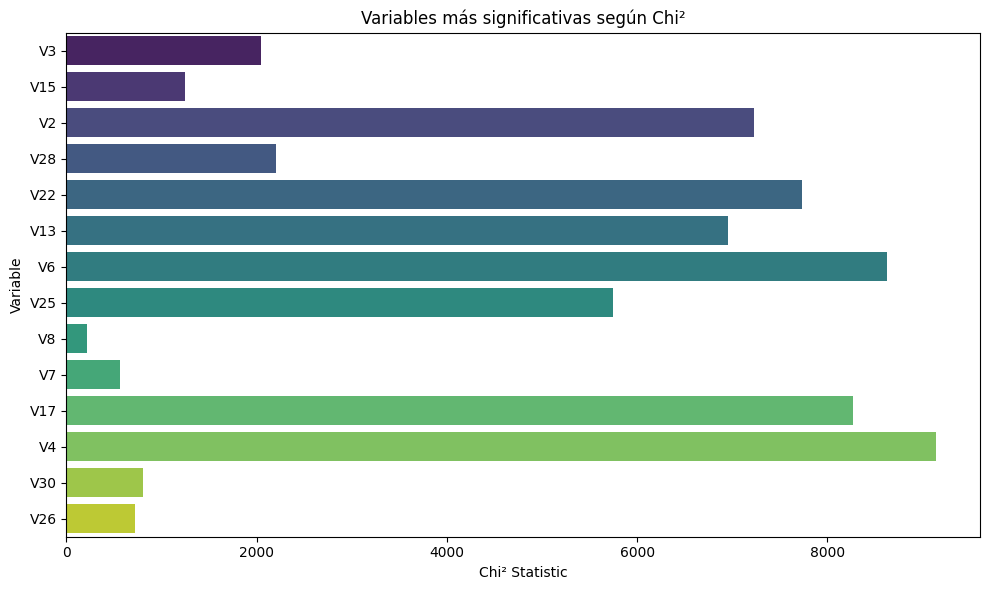

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=significant_vars, x='chi2', y='variable', palette='viridis')
plt.title('Variables más significativas según Chi²')
plt.xlabel('Chi² Statistic')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

***1.5.1. Se eliminan las variables que no son significativas y se crea un nuevo Data Frame con las variables mas significativas***

In [ ]:
# Lista de variables significativas extraída del resultado
significant_vars_list = ['V3', 'V15', 'V2', 'V28', 'V22', 'V13', 'V6', 'V25', 'V8', 'V7', 'V17', 'V4', 'V30', 'V26']

# Crear nuevo DataFrame con esas columnas + la variable objetivo (si quieres conservarla)
df2 = df1[significant_vars_list + ['OBJ']].copy()

# Ver las primeras filas para confirmar
df2.shape

(10000, 15)

2**. SELECCIÓN DE MODELO DE APRENDIZAJE SUPERVISADO DE CLASIFICACIÓN.**

**ENTRENAMIENTO Y COMPROBACIÓN CON CADA MODELO**

*Seleccion de las variables *

In [ ]:
X = df1.drop('OBJ', axis=1)
y = df1['OBJ']
#Division de los datos de prueba y entrenamiento 70 % entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Estandarizacion de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
y.value_counts()

,count
OBJ,
0,7335
1,2665


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

Se tiene desbalance de datos objetivos, 73% datos 0, 26 % datos 1, se realizara balanceo en los modelos

***2.1 Modelo de Clasificación KneighborsClassifier***

**Entrenamiento KneighborsClassifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test_scaled)



In [ ]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1191 1034]
 [ 402  373]]
              precision    recall  f1-score   support

           0       0.75      0.54      0.62      2225
           1       0.27      0.48      0.34       775

    accuracy                           0.52      3000
   macro avg       0.51      0.51      0.48      3000
weighted avg       0.62      0.52      0.55      3000



In [ ]:
#Usando gridSearch para optimizar los vecinos
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
print(best_params)

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform', metric='minkowski')
knn.fit(X_train_resampled, y_train_resampled)
y_pred = knn.predict(X_test_scaled)
print(f'Score Test {knn.score(X_test_scaled,y_test)}, Score train: {knn.score(X_train_scaled,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Score Test 0.577, Score train: 0.9997142857142857
[[1447  778]
 [ 491  284]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70      2225
           1       0.27      0.37      0.31       775

    accuracy                           0.58      3000
   macro avg       0.51      0.51      0.50      3000
weighted avg       0.62      0.58      0.60      3000



***2.2 Modelo de Regresión Logística***

*Entrenamiento*

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_resampled, y_train_resampled)

print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
Reglog = LogisticRegression(C=0.1, class_weight= None, penalty='l2', solver='lbfgs')
Reglog.fit(X_train_resampled, y_train_resampled)
y_pred = Reglog.predict(X_test_scaled)
print(f'Score Test {Reglog.score(X_test_scaled,y_test)}, Score train: {Reglog.score(X_train_scaled,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score Test 0.4256666666666667, Score train: 0.434
[[ 733 1492]
 [ 231  544]]
              precision    recall  f1-score   support

           0       0.76      0.33      0.46      2225
           1       0.27      0.70      0.39       775

    accuracy                           0.43      3000
   macro avg       0.51      0.52      0.42      3000
weighted avg       0.63      0.43      0.44      3000



***2.3 MODELO SVM***

In [ ]:
c = [0.01, 0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]
for i in c:
    for j in gamma:
        svm = SVC(kernel= 'rbf', C=i, gamma=j, class_weight='balanced')
        svm.fit(X_train_scaled, y_train)
        y_pred = svm.predict(X_test_scaled)
        print(f'C: {i}; gamma: {j}')
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

C: 0.01; gamma: 0.001
[[2157   68]
 [ 730   45]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      2225
           1       0.40      0.06      0.10       775

    accuracy                           0.73      3000
   macro avg       0.57      0.51      0.47      3000
weighted avg       0.66      0.73      0.65      3000

C: 0.01; gamma: 0.01
[[2057  168]
 [ 684   91]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      2225
           1       0.35      0.12      0.18       775

    accuracy                           0.72      3000
   macro avg       0.55      0.52      0.50      3000
weighted avg       0.65      0.72      0.66      3000

C: 0.01; gamma: 0.1
[[1675  550]
 [ 537  238]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2225
           1       0.30      0.31      0.30       775

    accuracy                          

In [ ]:
## C y gamma optimizado
svm = SVC(kernel= 'rbf', C=100, gamma=0.01, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
print(f'Score Test {svm.score(X_test_scaled,y_test)}, Score train: {svm.score(X_train_scaled,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Score Test 0.677, Score train: 0.718
[[1749  476]
 [ 493  282]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2225
           1       0.37      0.36      0.37       775

    accuracy                           0.68      3000
   macro avg       0.58      0.57      0.58      3000
weighted avg       0.67      0.68      0.68      3000



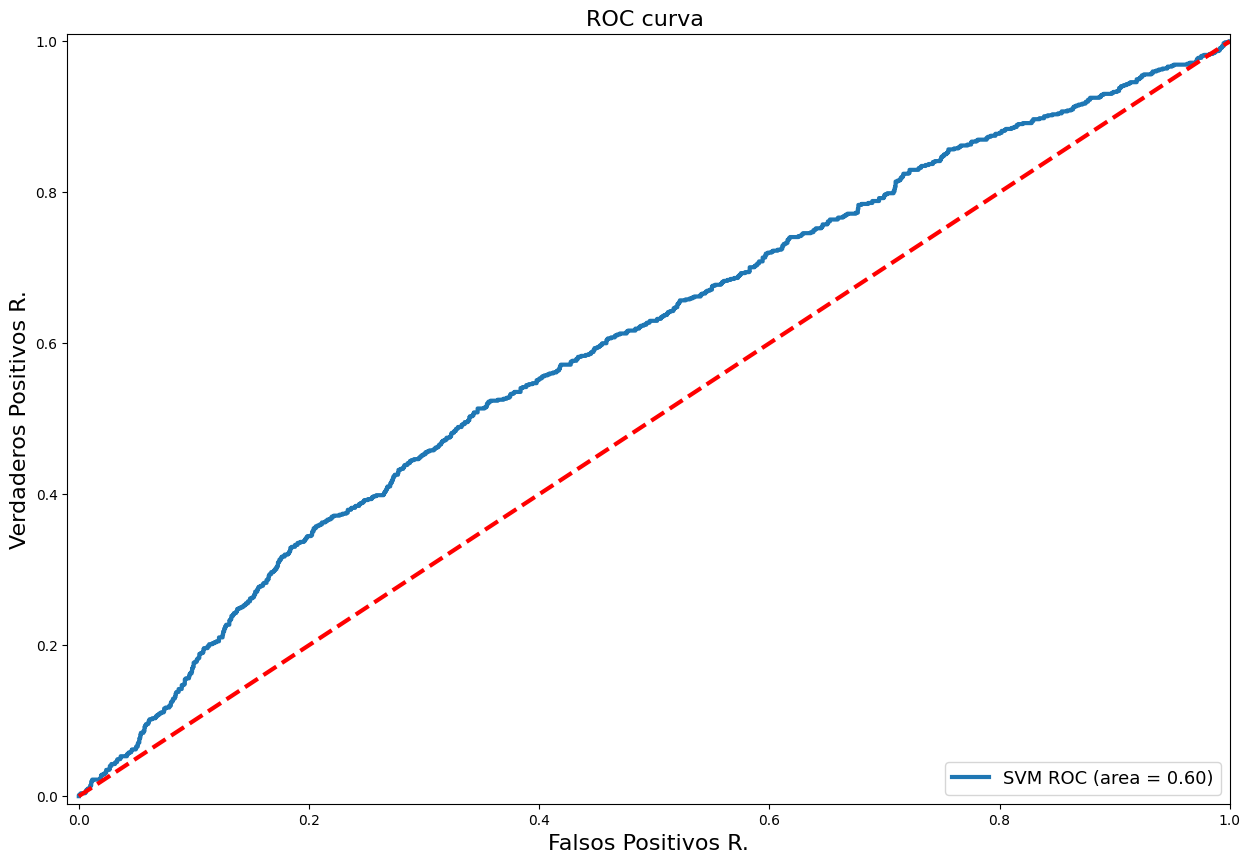

In [ ]:
y_score_rl = svm.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_rl)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svm, tpr_svm, lw=3, label='SVM ROC (area = {:0.2f})'.format(roc_auc_svm))
plt.xlabel('Falsos Positivos R.', fontsize=16)
plt.ylabel('Verdaderos Positivos R.', fontsize=16)
plt.title('ROC curva ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')

plt.show()

**2.4 MODELO ARBOL DE DECISION**

In [ ]:
max_d = [1,2,5,10,20,50]
min_s_l = [2,10,100]
min_s_sp = [2,10,100]

for i in max_d:
    for j in min_s_l:
        for k in min_s_sp:
            rf = DecisionTreeClassifier(random_state=42,class_weight= 'balanced', criterion= 'entropy', max_depth= i, min_samples_leaf= j, min_samples_split= k)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            print(f'max_depth: {i}; min_samples_leaf: {j}; min_samples_split: {k}')
            print(confusion_matrix(y_test, y_pred))
            print(classification_report(y_test, y_pred))

max_depth: 1; min_samples_leaf: 2; min_samples_split: 2
[[1322  903]
 [ 354  421]]
              precision    recall  f1-score   support

           0       0.79      0.59      0.68      2225
           1       0.32      0.54      0.40       775

    accuracy                           0.58      3000
   macro avg       0.55      0.57      0.54      3000
weighted avg       0.67      0.58      0.61      3000

max_depth: 1; min_samples_leaf: 2; min_samples_split: 10
[[1322  903]
 [ 354  421]]
              precision    recall  f1-score   support

           0       0.79      0.59      0.68      2225
           1       0.32      0.54      0.40       775

    accuracy                           0.58      3000
   macro avg       0.55      0.57      0.54      3000
weighted avg       0.67      0.58      0.61      3000

max_depth: 1; min_samples_leaf: 2; min_samples_split: 100
[[1322  903]
 [ 354  421]]
              precision    recall  f1-score   support

           0       0.79      0.59      

In [ ]:
arb = DecisionTreeClassifier(random_state=42,class_weight= 'balanced', criterion= 'entropy', max_depth= 5, min_samples_leaf= 2, min_samples_split= 2)
arb.fit(X_train, y_train)
y_pred = arb.predict(X_test)
print(f'Score Test {arb.score(X_test,y_test)}, Score train: {arb.score(X_train,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Score Test 0.6236666666666667, Score train: 0.6421428571428571
[[1535  690]
 [ 439  336]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2225
           1       0.33      0.43      0.37       775

    accuracy                           0.62      3000
   macro avg       0.55      0.56      0.55      3000
weighted avg       0.66      0.62      0.64      3000



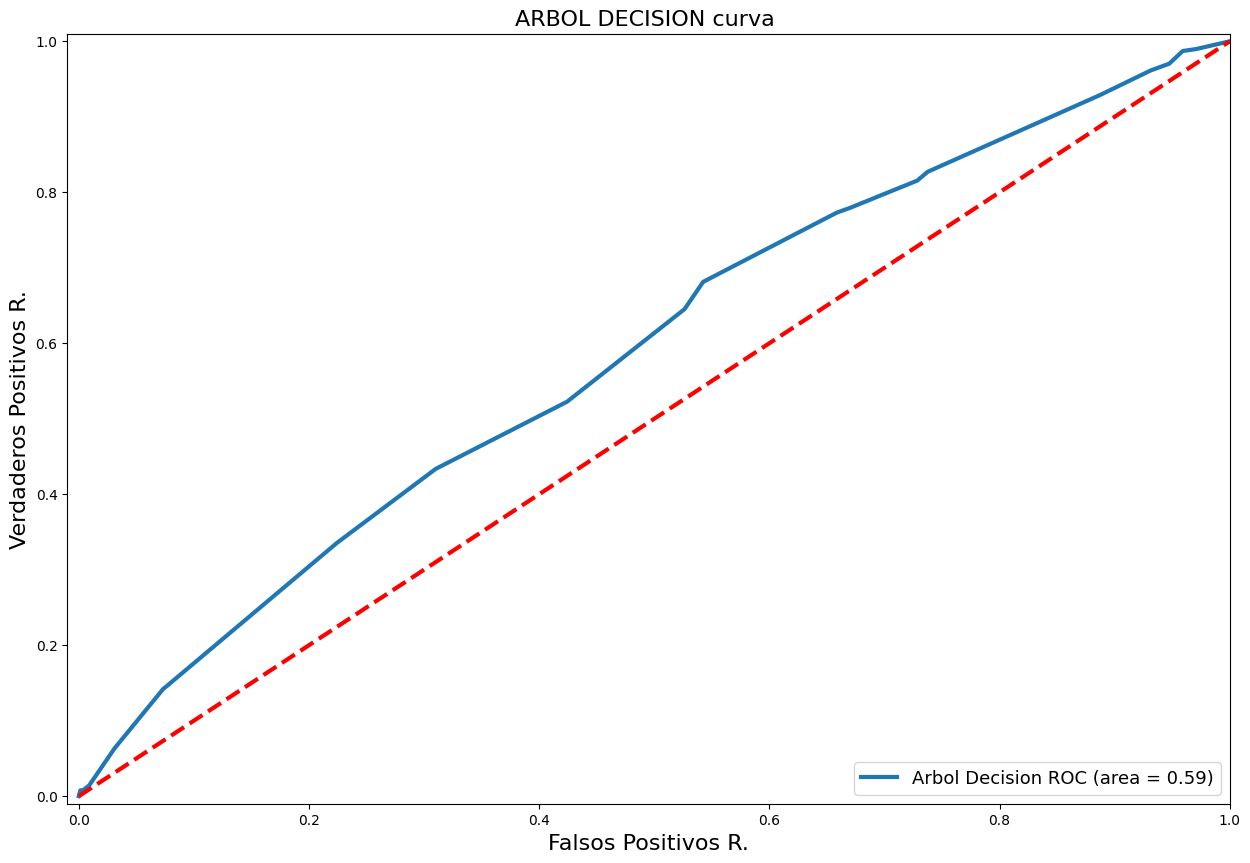

In [ ]:
y_score_arb = arb.fit(X_train, y_train).predict_proba(X_test)
fpr_arb, tpr_arb, _ = roc_curve(y_test, y_score_arb[:, 1])
roc_auc_arb = auc(fpr_arb, tpr_arb)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_arb, tpr_arb, lw=3, label='Arbol Decision ROC (area = {:0.2f})'.format(roc_auc_arb))
plt.xlabel('Falsos Positivos R.', fontsize=16)
plt.ylabel('Verdaderos Positivos R.', fontsize=16)
plt.title('ARBOL DECISION curva ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')

plt.show()

***2.4 MODELO RANDON FOREST***

In [ ]:
n_estimators = [5,10,20,30,50,100,200,300]
for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, class_weight= 'balanced', max_depth= 5,min_samples_leaf= 2, min_samples_split= 2 )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print(f'n_estimators: {i}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

n_estimators: 5
[[1338  887]
 [ 334  441]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      2225
           1       0.33      0.57      0.42       775

    accuracy                           0.59      3000
   macro avg       0.57      0.59      0.55      3000
weighted avg       0.68      0.59      0.62      3000

n_estimators: 10
[[1320  905]
 [ 337  438]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      2225
           1       0.33      0.57      0.41       775

    accuracy                           0.59      3000
   macro avg       0.56      0.58      0.55      3000
weighted avg       0.68      0.59      0.61      3000

n_estimators: 20
[[1292  933]
 [ 315  460]]
              precision    recall  f1-score   support

           0       0.80      0.58      0.67      2225
           1       0.33      0.59      0.42       775

    accuracy                           0.58      30

In [ ]:
rf = RandomForestClassifier(n_estimators= 50, class_weight= 'balanced', max_depth= 5,min_samples_leaf= 2, min_samples_split= 2 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'Score Test {rf.score(X_test,y_test)}, Score train: {rf.score(X_train,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Score Test 0.6003333333333334, Score train: 0.6442857142857142
[[1362  863]
 [ 336  439]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      2225
           1       0.34      0.57      0.42       775

    accuracy                           0.60      3000
   macro avg       0.57      0.59      0.56      3000
weighted avg       0.68      0.60      0.62      3000



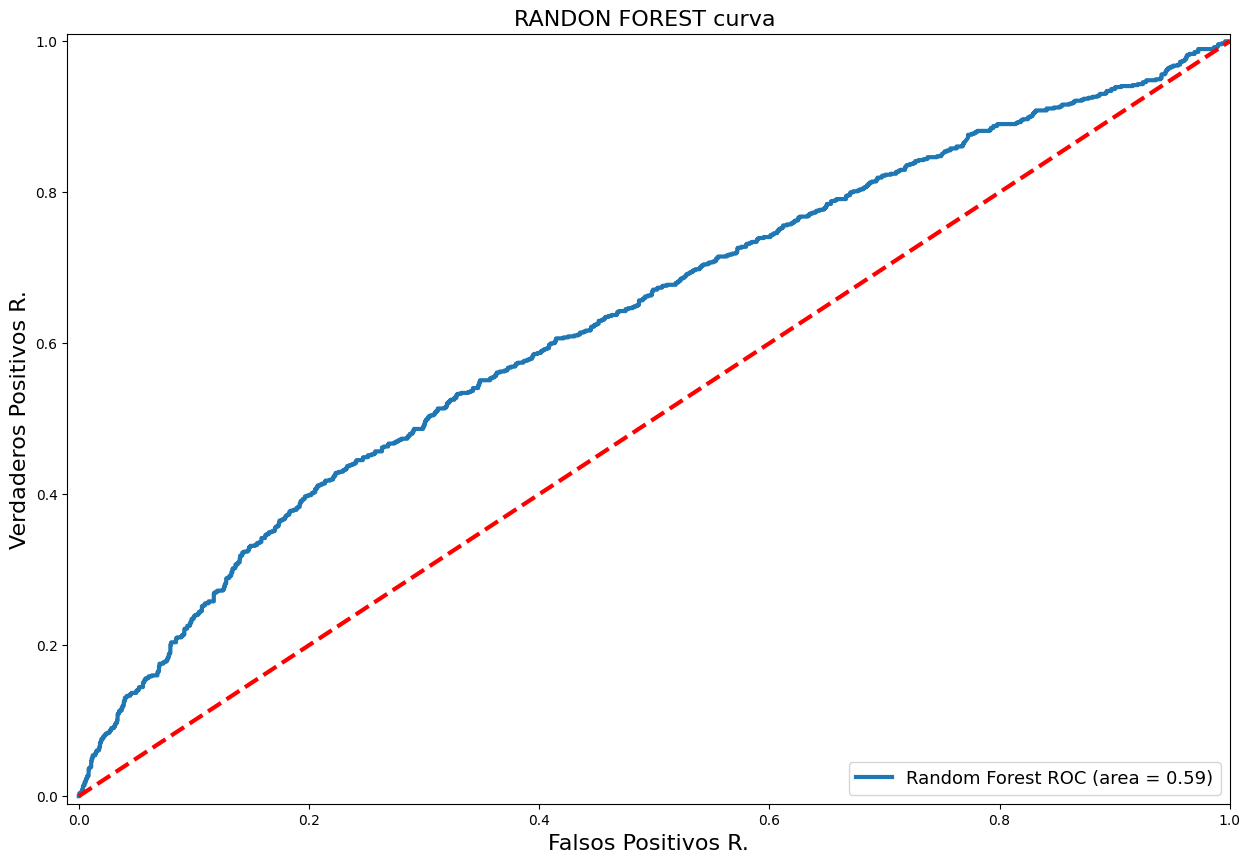

In [ ]:
y_score_rf = rf.fit(X_train, y_train).predict_proba(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:, 1])
roc_auc_rf = auc(fpr_arb, tpr_arb)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=3, label='Random Forest ROC (area = {:0.2f})'.format(roc_auc_rf))
plt.xlabel('Falsos Positivos R.', fontsize=16)
plt.ylabel('Verdaderos Positivos R.', fontsize=16)
plt.title('RANDON FOREST curva ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')

**2.5 MODELO XGBOOST**

In [ ]:
# Paso 1: Configuración de clasificador base
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',  # 'aucpr' si se quiere evaluar mientras entrena
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # importante para clases desbalanceadas
    n_jobs=-1,
    random_state=42
)

# Paso 2: Definición de la grilla de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Paso 3: Configuración de GridSearchCV con scoring='recall'
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='recall',
    cv=3,  # se puede aumentar a 5
    verbose=2,
    n_jobs=-1
)

# Paso 4: Ejecuta la búsqueda
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor recall obtenido: 0.5714285714285714


In [ ]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor recall obtenido: {grid_search.best_score_}")

Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor recall obtenido: 0.5714285714285714


In [ ]:
scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb = XGBClassifier(objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight = scale_pos_weight,
    n_jobs=-1,
    random_state=42,colsample_bytree=0.8,learning_rate=0.01, max_depth =3, n_estimators = 100, subsample= 1 )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f'Score Test {xgb.score(X_test,y_test)}, Score train: {xgb.score(X_train,y_train)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Score Test 0.602, Score train: 0.6181428571428571
[[1345  880]
 [ 314  461]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      2225
           1       0.34      0.59      0.44       775

    accuracy                           0.60      3000
   macro avg       0.58      0.60      0.56      3000
weighted avg       0.69      0.60      0.63      3000



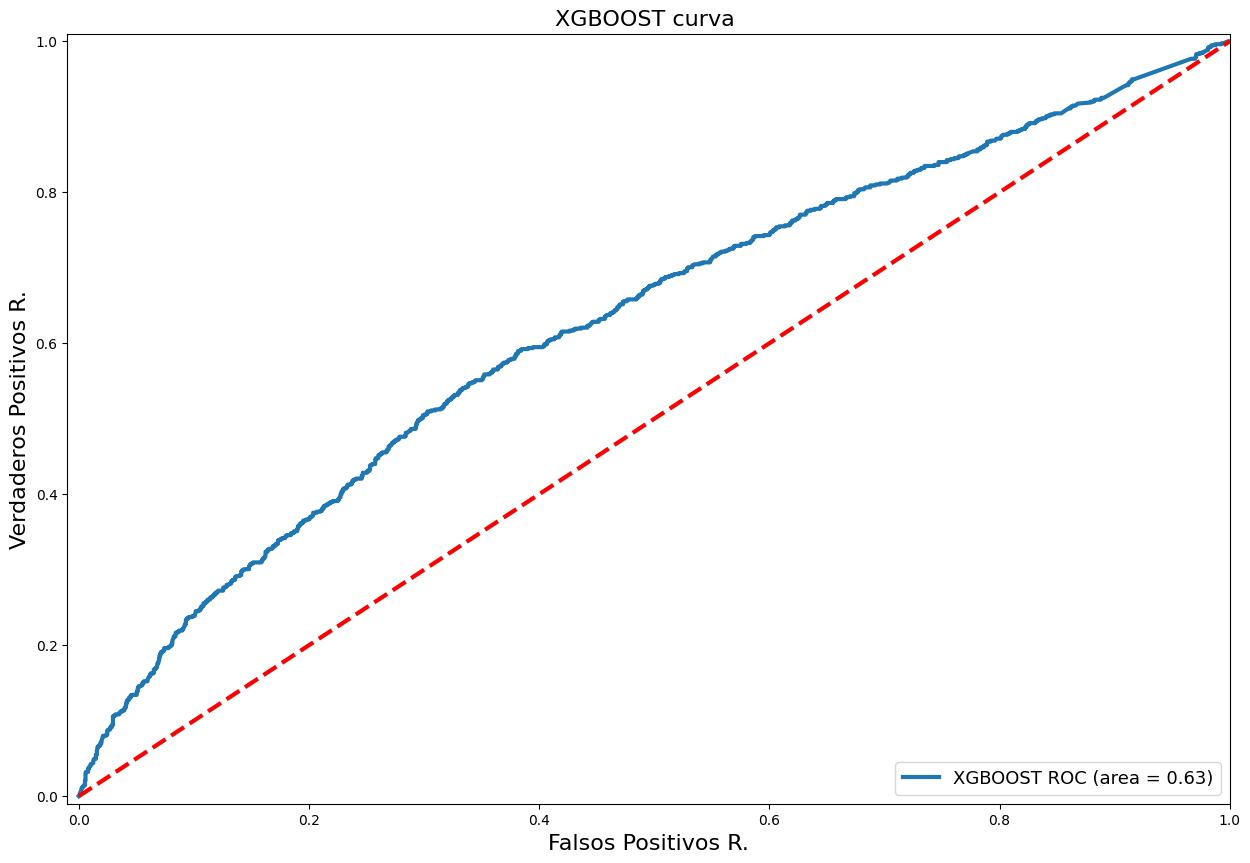

In [ ]:
y_score_xgb = xgb.fit(X_train, y_train).predict_proba(X_test)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(15, 10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_xgb, tpr_xgb, lw=3, label='XGBOOST ROC (area = {:0.2f})'.format(roc_auc_xgb))
plt.xlabel('Falsos Positivos R.', fontsize=16)
plt.ylabel('Verdaderos Positivos R.', fontsize=16)
plt.title('XGBOOST curva ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')

***CONCLUSIONES DEL PROYECTO***

1.-Sobreajuste en KNN:
El KNN presenta un muy alto desempeño en entrenamiento (casi 100%) pero baja precisión en test, indicando que el modelo está sobreajustado y no generaliza bien.

2.-Mejor equilibrio en XGBoost y Random Forest:
Estos modelos muestran scores de entrenamiento y test similares, con un buen balance entre precisión y recall en la clase minoritaria, lo que indica que la optimización mejoró la capacidad para detectar positivos sin sobreajustar.

3.-Regresión logística favorece recall a costa de precisión:
La regresión logística logró el mejor recall para la clase positiva (0.70), pero con un costo significativo en precisión y accuracy, lo que indica que es más sensible a detectar positivos, pero con muchos falsos positivos.

4.- SVC destaca en accuracy pero falla en recall:
El SVC tiene la mejor accuracy y buen desempeño en la clase mayoritaria, pero sigue teniendo dificultades para capturar bien la clase minoritaria, con un recall bajo.

5.- Árboles de decisión mejoran recall pero sacrifican precisión:
El árbol de decisión muestra un aumento en recall para la clase minoritaria respecto a Random Forest, pero la precisión baja, sugiriendo que podría estar produciendo más falsos positivos tras la optimización.

*** SE CONCLUYE QUE EL MEJOR MODELO DE MACHINE LEARNING ES XGBOOST CON LOS PARAMETROS OPTIMIZADOS***

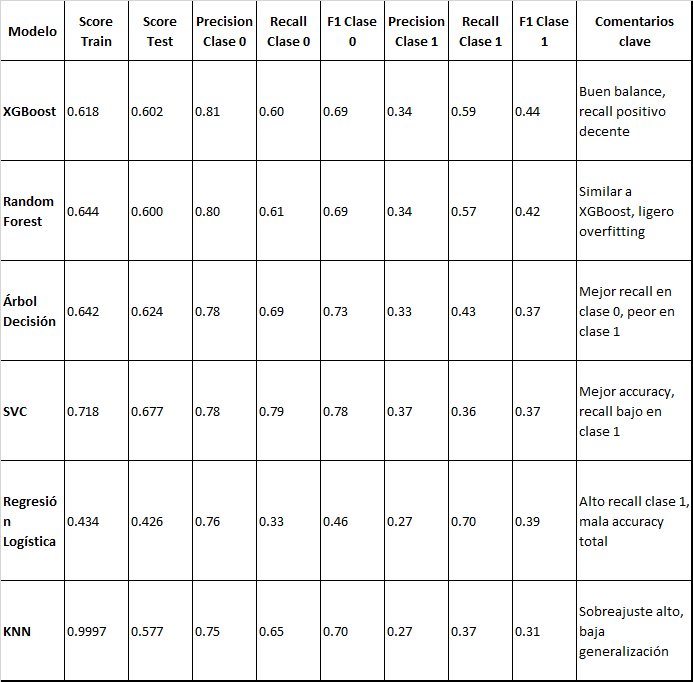